## Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

boston = load_boston()
feature_names = boston["feature_names"]
X = pd.DataFrame(boston["data"], columns=feature_names)
y = pd.DataFrame(boston["target"], columns=["price"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

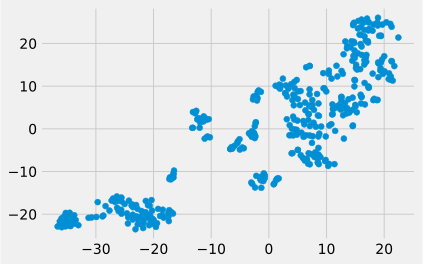

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=100)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.\
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


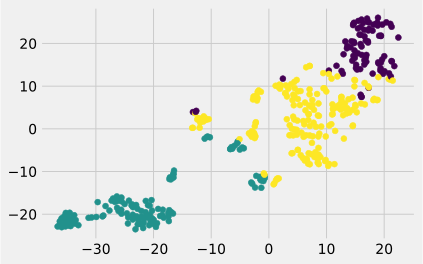

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [12]:
# price
print(f'Mean price in cluster 0 is {y_train[labels_train == 0].mean()}')
print(f'Mean price in cluster 1 is {y_train[labels_train == 1].mean()}')
print(f'Mean price in cluster 2 is {y_train[labels_train == 2].mean()}')


Mean price in cluster 0 is price    27.788372
dtype: float64
Mean price in cluster 1 is price    16.165354
dtype: float64
Mean price in cluster 2 is price    24.958115
dtype: float64


In [15]:
# CRIM
print('CRIM in cluster 0 is {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('CRIM in cluster 1 is {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('CRIM in cluster 2 is {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

CRIM in cluster 0 is 0.07356558139534884
CRIM in cluster 1 is 10.797028425196851
CRIM in cluster 2 is 0.4216602094240837


## *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [16]:
labels_test = kmeans.fit_predict(X_test_scaled)

# price
print(f'Mean price in test cluster 0 is {y_test[labels_test == 0].mean()}')
print(f'Mean price in test cluster 1 is {y_test[labels_test == 1].mean()}')
print(f'Mean price in test cluster 2 is {y_test[labels_test == 2].mean()}')

# CRIM
print('CRIM in test cluster 0 is {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('CRIM in test cluster 1 is {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('CRIM in test cluster 2 is {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Mean price in test cluster 0 is price    33.871429
dtype: float64
Mean price in test cluster 1 is price    21.55283
dtype: float64
Mean price in test cluster 2 is price    16.437143
dtype: float64
CRIM in test cluster 0 is 0.08618571428571427
CRIM in test cluster 1 is 0.25200716981132076
CRIM in test cluster 2 is 10.165531142857143
